In [31]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
from datetime import date
import matplotlib.pyplot as plt



def dateFromFloat(date_Float:float):
    day= date_Float % 100
    month = (date_Float // 100)%100 
    year = date_Float // 10000
    return date(year,month,day)





In [62]:
#Load the data
file0 = "/Users/apple/Workspace/intelliJ/jockey/regression_20190127.csv"
dataset0 = pd.read_csv(file0)
raceClass=4
distance=1400
date=20190120
dataset_train=dataset0[(dataset0['raceClass']==raceClass) & (dataset0['distance']==distance) 
                        & (dataset0['rateDate']!=date)]
dataset_test=dataset0[(dataset0['raceClass']==raceClass) & (dataset0['distance']==distance)
                      & (dataset0['rateDate']==date)]

dataset_train.shape
dataset_test.shape

(14, 27)

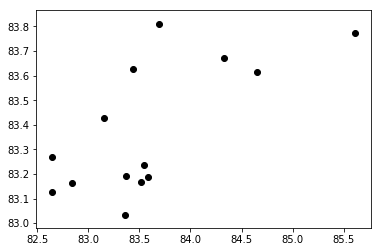

Mean squared error: 0.44
Variance score: 0.26


0.3404560900472854

In [63]:
features=['draw','addedWeight','declaredHorseWeight','horse_winPer',
                 'horse_winCount','jockey_winPer','jockey_winCount','horse_newDistance','horse_newHorse',
         'horse_last4SpeedRate','horse_latestSpeedRate','Days_from_lastRace']
target=['finishTime']
#regression model of lbw or finishTime
X_train=dataset_train[features]
y_train=dataset_train[target] #lbw

X_test=dataset_test[features]
y_test=dataset_test[target] #lbw


reg = LinearRegression()
reg.fit(X_train,y_train)
y_test_predicted=reg.predict(X_test)
plt.scatter(y_test, y_test_predicted,  color='black')
 
    
plt.show()
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_test_predicted))

explained_variance_score(y_test, y_test_predicted)


In [64]:
df = pd.DataFrame(data=y_test_predicted, index=y_test.index,columns=['finishTime_predicted'])
dataset_test_toshow=dataset_test[['rateDate','raceSeqOfDate','distance','raceClass','horseId','place','winOdds','lbw','finishTime']]
dataset_test_withPredicted=dataset_test_toshow.merge(df,how='inner',left_index=True,right_index=True)
dataset_test_withPredicted = dataset_test_withPredicted.sort_values(['raceSeqOfDate','finishTime_predicted'])
dataset_test_withPredicted

,rateDate,raceSeqOfDate,distance,raceClass,horseId,place,winOdds,lbw,finishTime,finishTime_predicted
13574,20190120,1,1400,4,V417,5,24.0,4.50,83.36,83.035082
13570,20190120,1,1400,4,V069,1,17.0,0.00,82.65,83.128382
13572,20190120,1,1400,4,A145,3,9.4,1.25,82.84,83.163083
13577,20190120,1,1400,4,A294,8,6.8,5.50,83.52,83.167744
13579,20190120,1,1400,4,B299,10,38.0,5.75,83.58,83.188831
13575,20190120,1,1400,4,B472,6,14.0,4.50,83.37,83.190454
13578,20190120,1,1400,4,A125,9,11.0,5.75,83.55,83.238466
13571,20190120,1,1400,4,B311,2,2.3,0.05,82.65,83.270792
13573,20190120,1,1400,4,A088,4,7.8,3.00,83.15,83.427545
13582,20190120,1,1400,4,B028,13,44.0,12.50,84.65,83.615788


In [ ]:
frames = [X_test, y_test]
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
result